# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pingouin as pg
import missingno as msno
import warnings
warnings.filterwarnings("ignore")

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.6) or chardet (5.0.0)/charset_normalizer (2.0.6) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
%matplotlib inline

In [3]:
data= pd.read_csv("C:/Users/lenovo/data/openfoodfacts_clean_data.csv")

*****
***BILAN des variables***
*****
Notre jeu de données est composée de différentes variables :<br>
<li>Des variables en lien avec l'identification des produits <br> (noms, endroits où ils sont commercialisés, date d'ajout dans la base, date de modification dans la base)</li>
<li>Des variables qui mesurent la qualité des produits (nutriscore)</li>
<li>Des variables sur les différentes valeurs nutrionnelles du produit (graisse, graisse saturée, carbohydrates, sucres, fibres, protéines, sel)</li>
<li>Des variables sur l'énergie que l'on trouve dans chaque produit (énergie en kcal)</li>

In [4]:
data.head(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000100,http://world-fr.openfoodfacts.org/produit/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,courte paille,...,NaN,936.0,8.2,2.2,29.0,22.0,5.1,4.600,1.8400,18.0
1,0000000000949,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,...,32.0,134.0,0.3,0.1,5.3,3.9,0.9,0.420,0.1680,1.0
2,0000000001281,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1517830801,2018-02-05T11:40:01Z,1527070794,2018-05-23T10:19:54Z,Tarte noix de coco,NaN,"Crous Resto',Crous",...,381.0,1594.0,22.0,15.5,27.3,21.9,4.6,0.100,0.0400,14.0
3,0000000001885,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1511180337,2017-11-20T12:18:57Z,1518126491,2018-02-08T21:48:11Z,Compote de poire,NaN,Crous,...,157.0,657.0,0.0,0.0,36.0,27.0,0.6,0.000,0.0000,-2.0
4,0000000002257,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1520506122,2018-03-08T10:48:42Z,1561463749,2019-06-25T11:55:49Z,Salade de macedoine de légumes,NaN,NaN,...,143.0,598.0,12.7,1.0,3.9,1.0,1.9,0.270,0.1080,1.0
5,0000000005005,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1521663684,2018-03-21T20:21:24Z,1545934272,2018-12-27T18:11:12Z,Abondance,NaN,NaN,...,397.0,1661.0,33.0,21.6,0.1,0.1,25.0,1.300,0.5200,14.0
6,0000000005166,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1539279826,2018-10-11T17:43:46Z,1549996692,2019-02-12T18:38:12Z,cuisse de poulet direct au four curry,NaN,NaN,...,197.0,824.0,13.0,4.0,3.0,0.9,17.0,1.100,0.4400,4.0
7,0000000005241,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1540886513,2018-10-30T08:01:53Z,1544548114,2018-12-11T17:08:34Z,Bagel,NaN,NaN,...,197.0,824.0,5.0,1.1,28.7,3.0,8.4,0.467,0.1868,0.0
8,0000000005470,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1511778860,2017-11-27T10:34:20Z,1550180518,2019-02-14T21:41:58Z,BAguette bressan,1,Crousresto',...,160.0,669.0,2.2,0.5,25.2,0.6,9.5,0.358,0.1432,-4.0
9,0000000005661,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1522424158,2018-03-30T15:35:58Z,1522437072,2018-03-30T19:11:12Z,Pavé de saumon fumé à la ficelle,NaN,NaN,...,253.0,1059.0,17.0,2.6,0.5,0.5,23.0,2.500,1.0000,15.0


La note Nutri-Score:  est déterminée par la quantité de nutriments bons et mauvais pour la santé :<br>
<strong> Points négatifs </strong> : l'énergie, les graisses saturées, les sucres, et le sodium (des niveaux élevés sont considérés comme mauvais pour la santé)<br>
<strong> Points positifs </strong> : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).

<strong> Le Nutri-Score : </strong> c’est ce petit logo apposé sur les emballages qui note les produits de A, vert foncé, pour les plus favorables sur le plan nutritionnel, à E, orange foncé, pour les moins favorables. Il est pratique et bien utile pour comparer les produits en un coup d’œil quand on fait ses courses et identifier ceux de meilleure qualité nutritionnelle.Il est utilisé pour manger mieux au quotidien. 

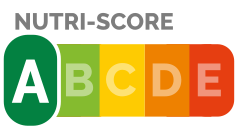

Les produits qui remportent un score : <br>
<li> A et B sont les plus équilibrés et peuvent être consommés très régulièrement, </li>
<li> C et D, sont à consommer en quantité modérée, </li>
<li> E, sont les moins équilibrés doivent idéalement être consommés rarement.</li>


<strong> Répartition des Nutriscores dans notre base de données </strong>

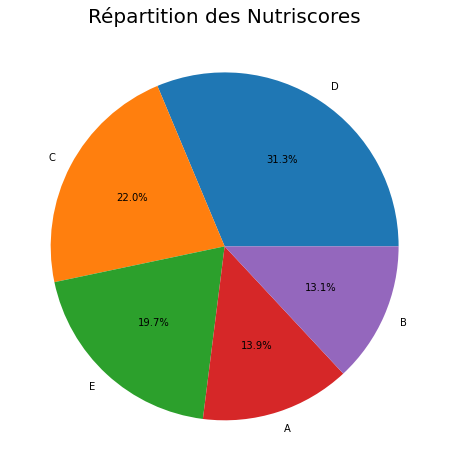

In [5]:
plt.figure(figsize=(8,8))
plt.title('Répartition des Nutriscores', size=20)
wedges, texts, autotexts = plt.pie(data.nutriscore_grade.value_counts().values, 
        labels = data.nutriscore_grade.value_counts().index.str.upper(),
       autopct='%1.1f%%'
       )





****
***Remarque***
****
la catégorie D des nutri-grades est majoritairement représentée avec 31.3 % des entrées de la base.<br>
Suivent les grades C et E puis les grades A et B. 

<strong> Quantité de chaque macronutriement en fonction du Nutri-Score </strong>

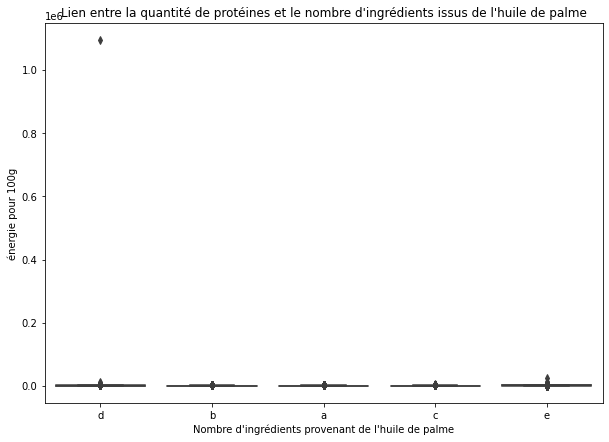

In [6]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="energy_100g", data=data)
plt.xlabel("Nombre d'ingrédients provenant de l'huile de palme")
plt.ylabel("énergie pour 100g")
plt.title("Lien entre la quantité de protéines et le nombre d'ingrédients issus de l'huile de palme")
plt.show()

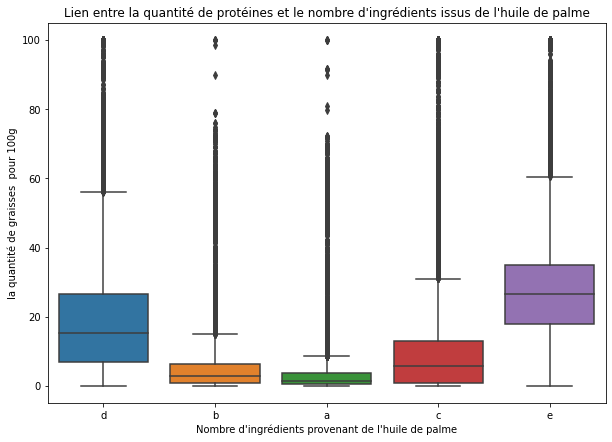

In [7]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="fat_100g", data=data)
plt.xlabel("Nombre d'ingrédients provenant de l'huile de palme")
plt.ylabel("la quantité de graisses  pour 100g")
plt.title("Lien entre la quantité de protéines et le nombre d'ingrédients issus de l'huile de palme")
plt.show()

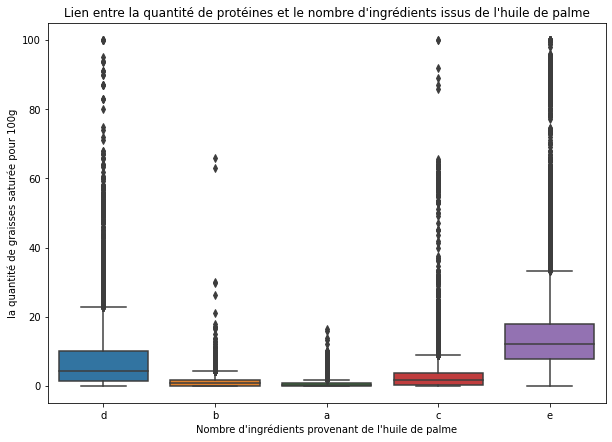

In [131]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="saturated-fat_100g", data=data)
plt.xlabel("Nombre d'ingrédients provenant de l'huile de palme")
plt.ylabel("la quantité de graisses saturée pour 100g")
plt.title("Lien entre la quantité de protéines et le nombre d'ingrédients issus de l'huile de palme")
plt.show()

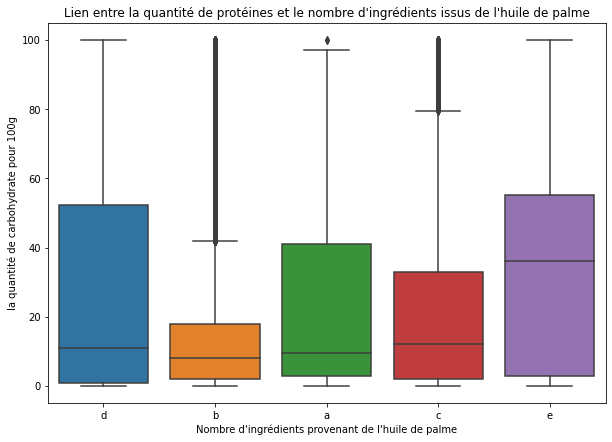

In [132]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="carbohydrates_100g", data=data)
plt.xlabel("Nombre d'ingrédients provenant de l'huile de palme")
plt.ylabel("la quantité de carbohydrate pour 100g")
plt.title("Lien entre la quantité de protéines et le nombre d'ingrédients issus de l'huile de palme")
plt.show()

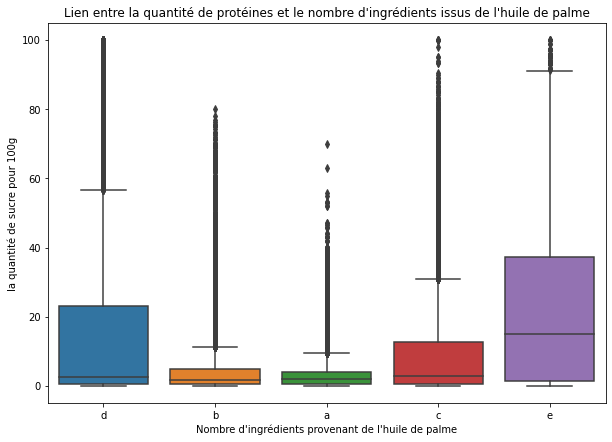

In [133]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="sugars_100g", data=data)
plt.xlabel("Nombre d'ingrédients provenant de l'huile de palme")
plt.ylabel("la quantité de sucre pour 100g")
plt.title("Lien entre la quantité de protéines et le nombre d'ingrédients issus de l'huile de palme")
plt.show()

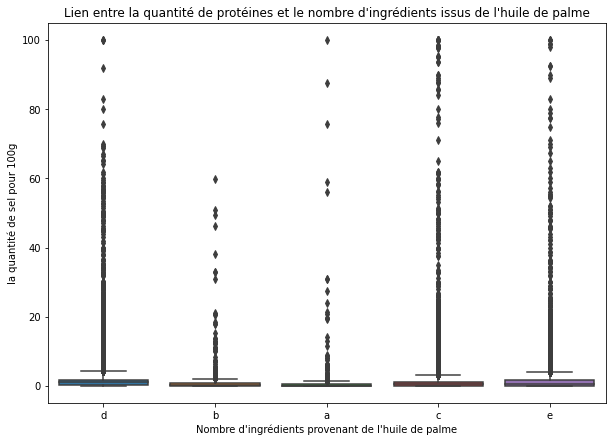

In [134]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="salt_100g", data=data)
plt.xlabel("Nombre d'ingrédients provenant de l'huile de palme")
plt.ylabel("la quantité de sel pour 100g")
plt.title("Lien entre la quantité de protéines et le nombre d'ingrédients issus de l'huile de palme")
plt.show()

****
***Observation***
****
Plus il y a de sucre, de graisses et de sel dans un produit et plus son Nutri-Score est mauvais.Donc on suppose qu'il existe une relation entre les macronutriement et le nutriscore_grade à vérifier par le test de Fisher (ANOVA 1).


In [8]:
data.head(3)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,brands,...,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,0000000000100,http://world-fr.openfoodfacts.org/produit/0000...,del51,1444572561,2015-10-11T14:09:21Z,1444659212,2015-10-12T14:13:32Z,moutarde au moût de raisin,100g,courte paille,...,NaN,936.0,8.2,2.2,29.0,22.0,5.1,4.60,1.840,18.0
1,0000000000949,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1565268412,2019-08-08T12:46:52Z,Salade de carottes râpées,NaN,NaN,...,32.0,134.0,0.3,0.1,5.3,3.9,0.9,0.42,0.168,1.0
2,0000000001281,http://world-fr.openfoodfacts.org/produit/0000...,kiliweb,1517830801,2018-02-05T11:40:01Z,1527070794,2018-05-23T10:19:54Z,Tarte noix de coco,NaN,"Crous Resto',Crous",...,381.0,1594.0,22.0,15.5,27.3,21.9,4.6,0.10,0.040,14.0


In [9]:
# suppression des colonnes qui ne vont pas être utiles à l'analyse
col = ['code','creator','quantity','ingredients_text','states','nutrition-score-fr_100g']
data.drop(col, axis=1, inplace=True)

In [10]:
# transformation des variables catégorielles en catégorie
col_cat = ["countries", "ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n", "nutriscore_grade"]
for col in col_cat:
    data[col] = data[col].astype("category")

# Feature Engineering

# 1-TRAITEMENT DES VALEURS MANQUANTES 

In [11]:
data.isna().sum()

url                                             0
created_t                                       0
created_datetime                                0
last_modified_t                                 0
last_modified_datetime                          0
product_name                                    0
brands                                      67662
brands_tags                                 67676
categories                                      2
categories_tags                                 2
categories_fr                                   2
labels                                     164452
labels_tags                                164451
labels_fr                                  164451
countries                                       0
countries_tags                                  0
countries_fr                                    0
additives_n                                131645
ingredients_from_palm_oil_n                131645
ingredients_that_may_be_from_palm_oil_n    131645


<AxesSubplot:>

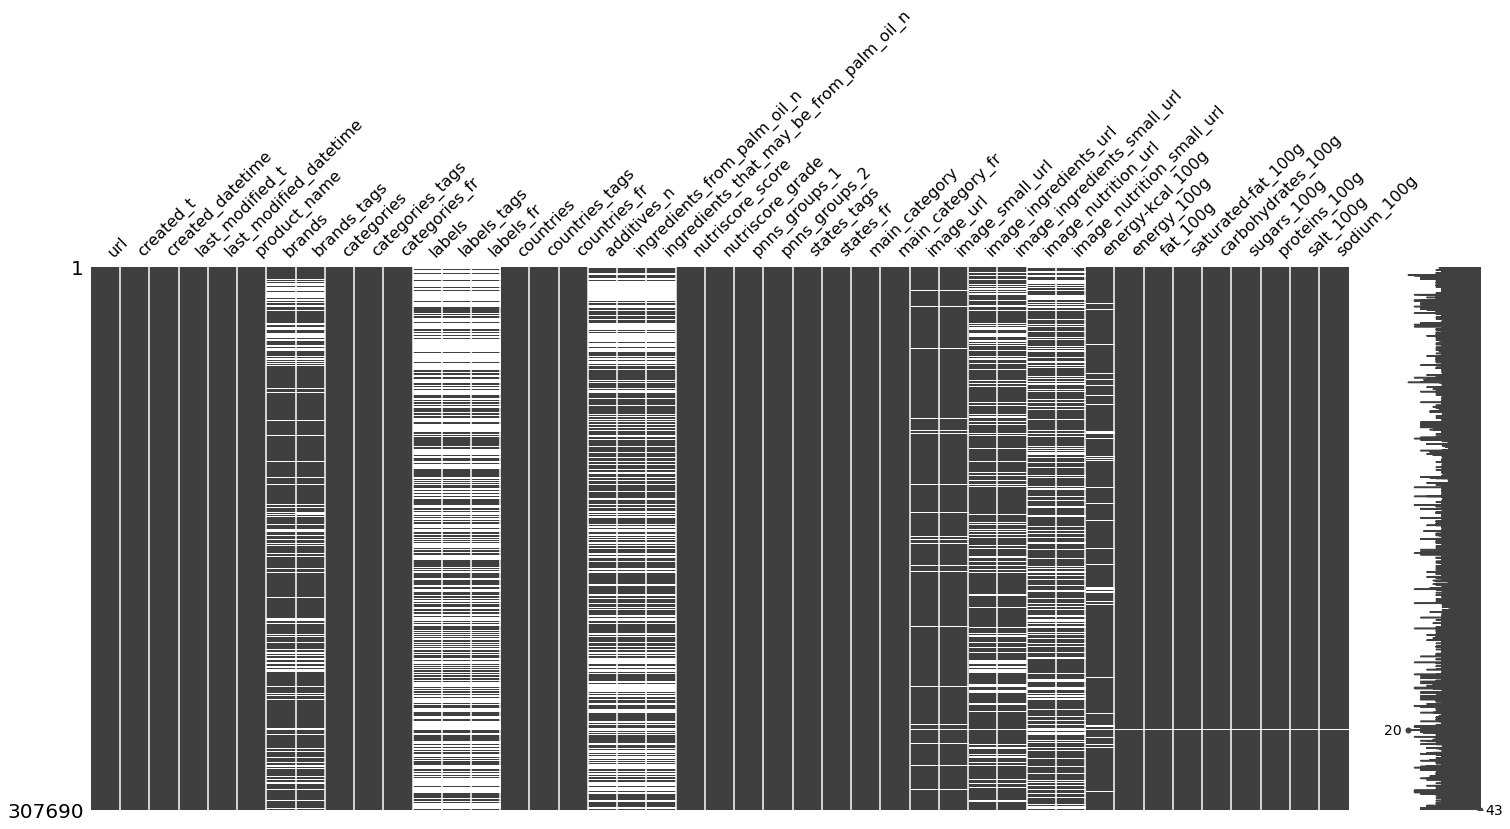

In [12]:
msno.matrix(data)

## Imputation des données manquantes 

on choisit d'imputer les valeurs manquantes en utilisant la médiane en fonction de la variable pnns_groups_2. La médiane permet de ne pas prendre en compte les valeurs extrêmes qui pourraient être présentes dans le jeu de données. 

In [15]:
# Cette imputation est réaliser uniquement pour les valeurs numériques
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
for col in numeric_columns:
      data[col].fillna(data.groupby('pnns_groups_2')[col].transform('median'), inplace=True)

In [16]:
data.isna().sum()

url                                             0
created_t                                       0
created_datetime                                0
last_modified_t                                 0
last_modified_datetime                          0
product_name                                    0
brands                                      67662
brands_tags                                 67676
categories                                      2
categories_tags                                 2
categories_fr                                   2
labels                                     164452
labels_tags                                164451
labels_fr                                  164451
countries                                       0
countries_tags                                  0
countries_fr                                    0
additives_n                                     0
ingredients_from_palm_oil_n                131645
ingredients_that_may_be_from_palm_oil_n    131645


# 2- Analyses univariées

On va réaliser une analyse univariée de nos différentes variables pour voir leur comportement. On va commencer par s'intéresser aux variables catégorielles avant de se pencher sur les variables quantitatives.

## a) Description des variables qualitatives

<li> Les types  produits </li>

In [17]:
print('Nombre de produits :', len(data['product_name']))

Nombre de produits : 307690


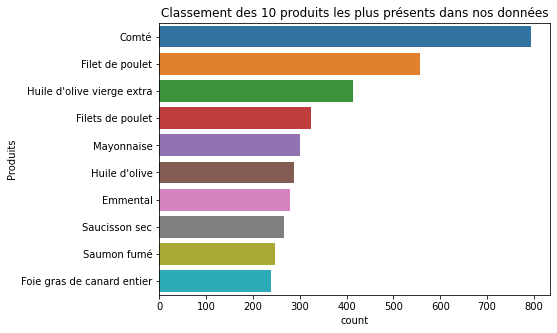

In [18]:
plt.figure(figsize=(7, 5))
sns.countplot(y="product_name", data=data, order=pd.value_counts(data['product_name']).iloc[:10].index)
plt.ylabel("Produits")
plt.title("Classement des 10 produits les plus présents dans nos données")
plt.show()

<li> Les marques de distributeurs </li>

In [19]:
print('Nombre de marques :', len(data['brands'].unique()))

Nombre de marques : 46529


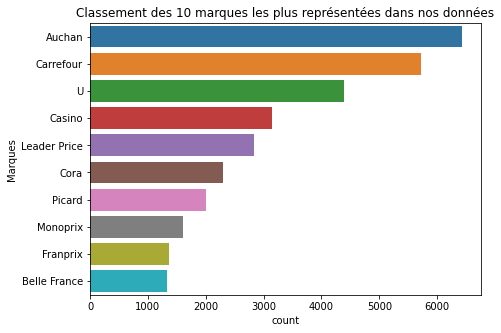

In [20]:
plt.figure(figsize=(7, 5))
sns.countplot(y="brands", data=data, order=pd.value_counts(data['brands']).iloc[:10].index)
plt.ylabel("Marques")
plt.title("Classement des 10 marques les plus représentées dans nos données")
plt.show()

<li>Les années de création et de modification</li>

In [21]:
print("Nombre d'années de création : ", len(data["created_datetime"].unique()))
print("Année avec le plus d'ajout de produits :", data['created_datetime'].mode()[0])
print("Nombre d'années de modification : ", len(data['last_modified_datetime'].unique()))
print("Année avec le plus de mise à jour de produits :", data['last_modified_datetime'].mode()[0])

Nombre d'années de création :  306479
Année avec le plus d'ajout de produits : 2021-01-19T15:11:47Z
Nombre d'années de modification :  254588
Année avec le plus de mise à jour de produits : 2021-08-28T10:49:41Z


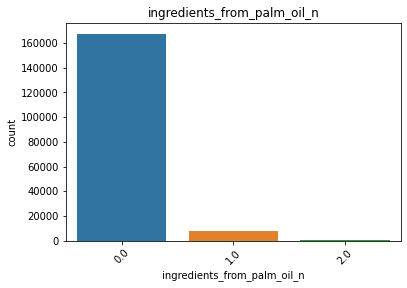

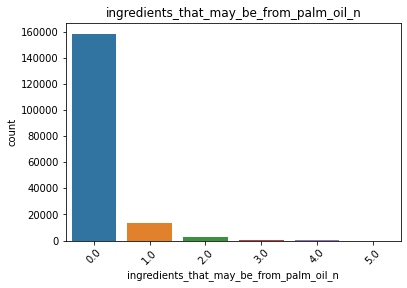

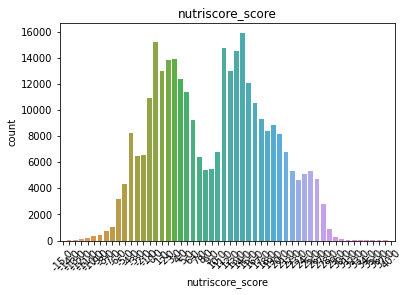

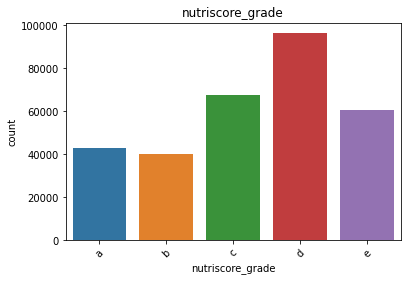

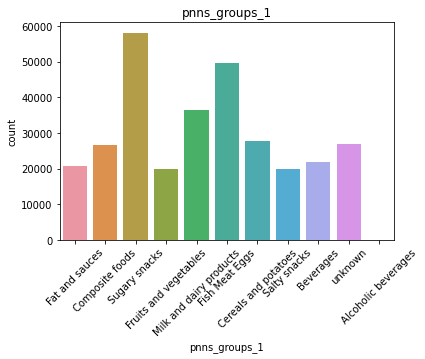

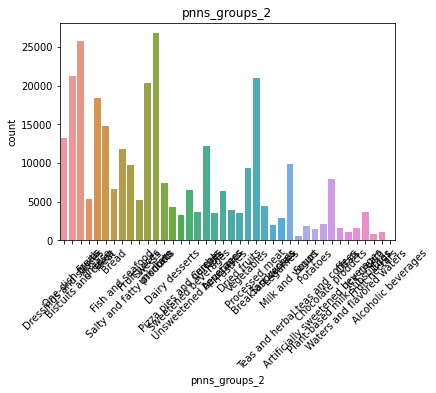

In [22]:
col_cat = ["ingredients_from_palm_oil_n", "ingredients_that_may_be_from_palm_oil_n", 
           "nutriscore_score", "nutriscore_grade", "pnns_groups_1", "pnns_groups_2"]
for col in col_cat:
    sns.countplot(x=col, data=data)
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()

## b) Description de la distribution des variables quantitatives

On va générer des histogrammes pour évaluer la distribution de chacune de nos variables quantitatives.

In [23]:
data.columns

Index(['url', 'created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime', 'product_name', 'brands', 'brands_tags',
       'categories', 'categories_tags', 'categories_fr', 'labels',
       'labels_tags', 'labels_fr', 'countries', 'countries_tags',
       'countries_fr', 'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score',
       'nutriscore_grade', 'pnns_groups_1', 'pnns_groups_2', 'states_tags',
       'states_fr', 'main_category', 'main_category_fr', 'image_url',
       'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

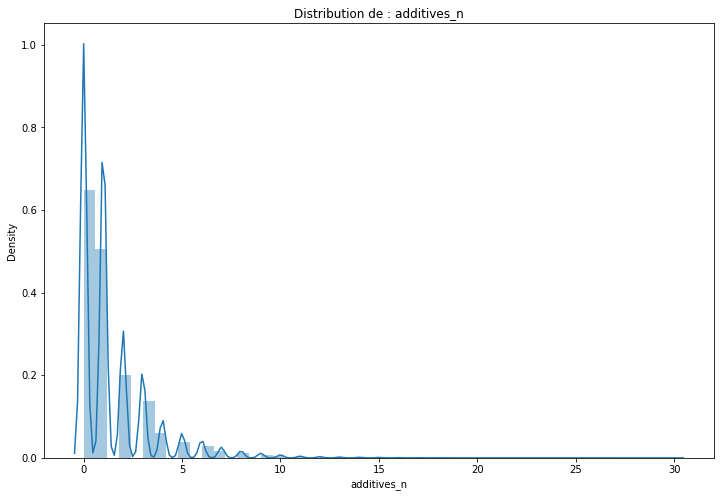

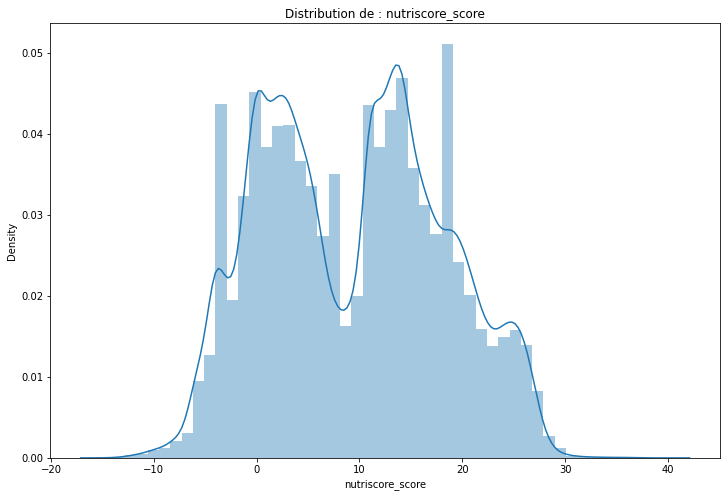

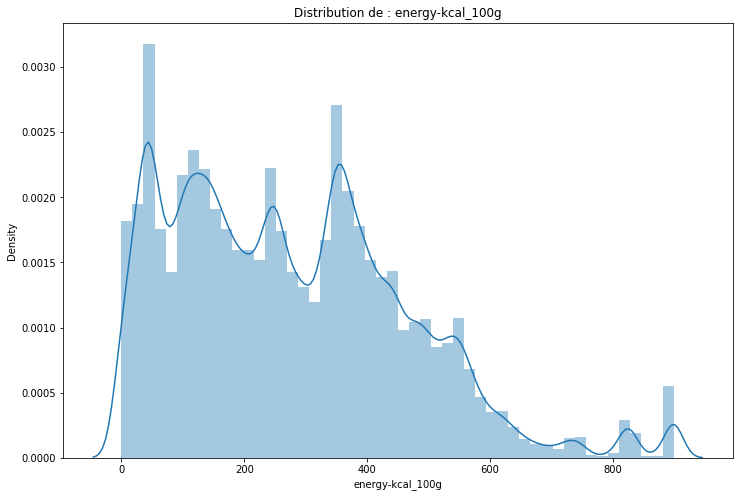

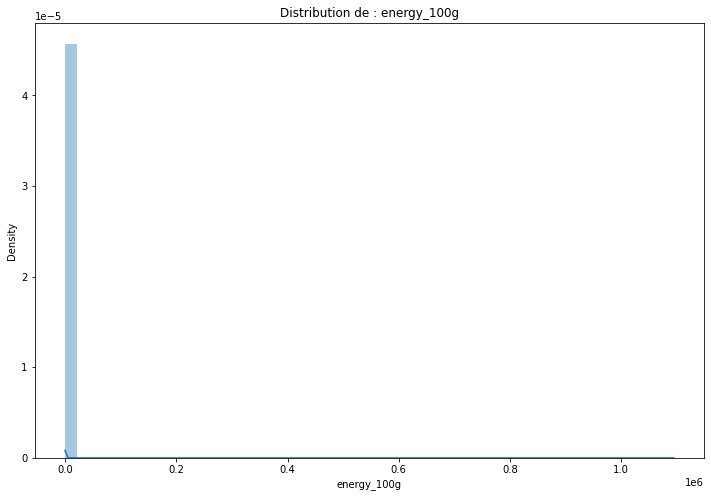

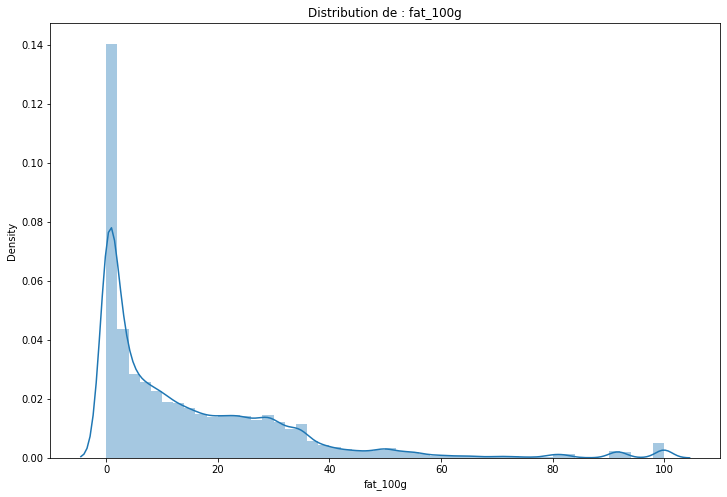

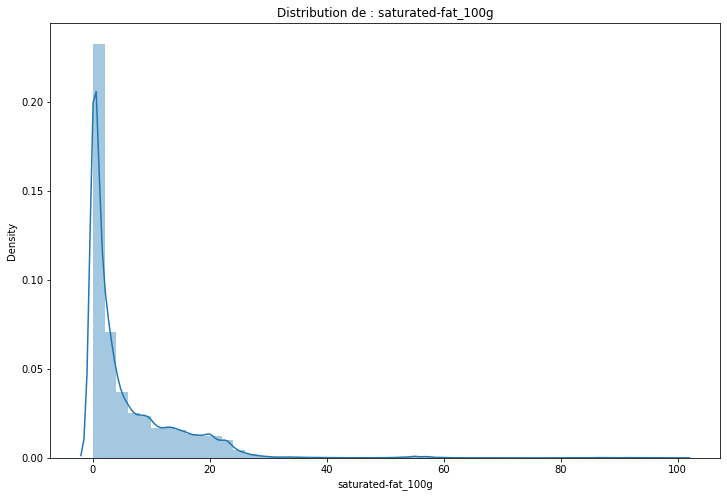

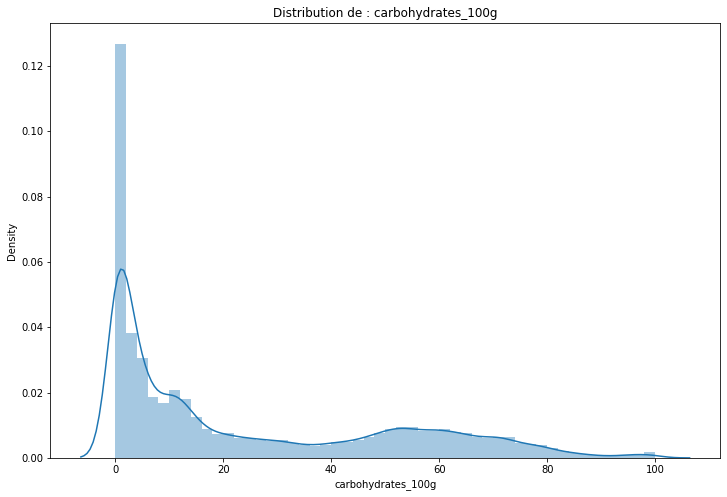

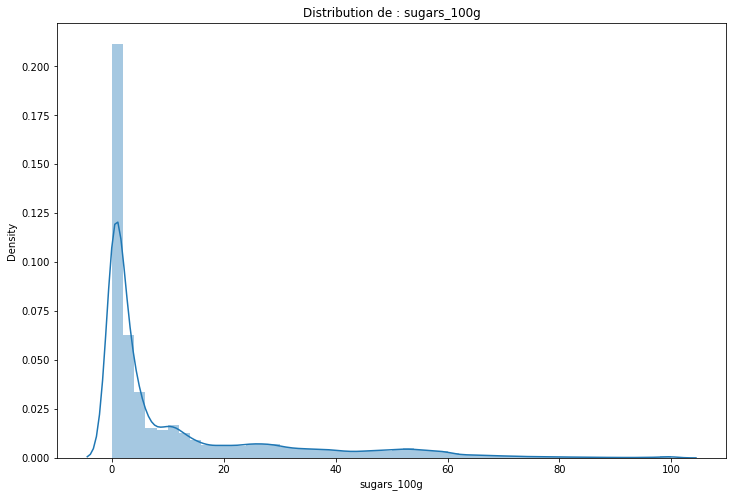

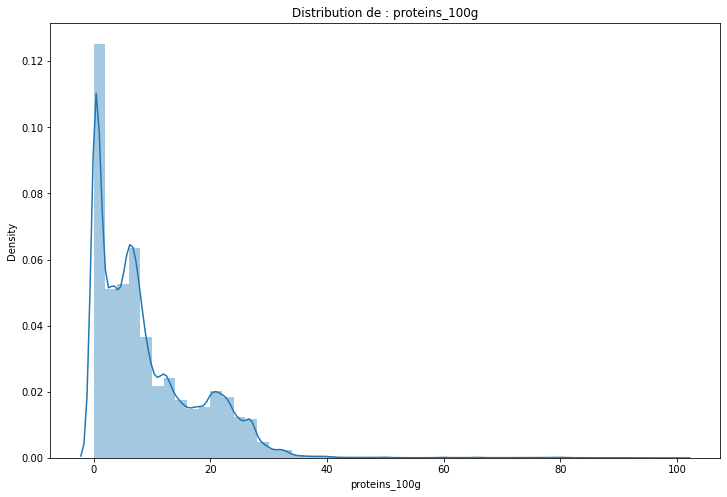

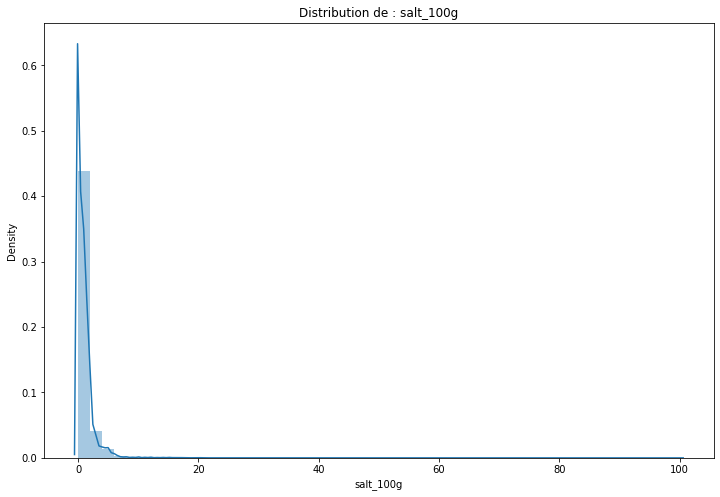

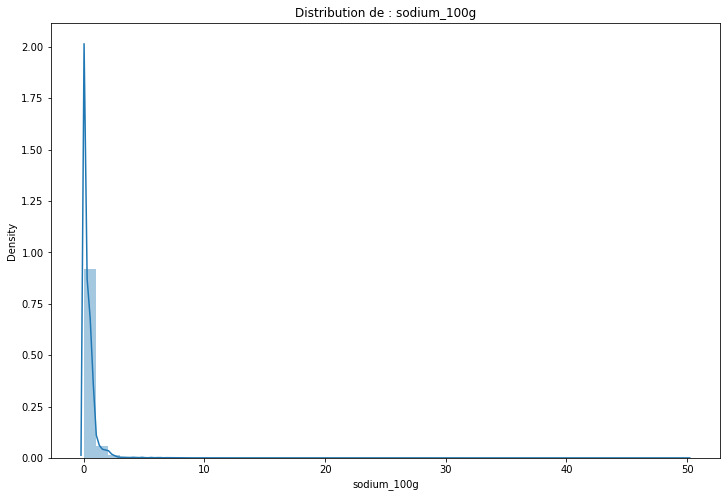

In [24]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
for column in numeric_columns:
        plt.figure(figsize = (12,8))
        
        sns.distplot(data[column], bins=50)
        chaine = 'Distribution de : ' + column
        plt.title(chaine)
        plt.xlabel(column)
        plt.show()

Certaines distributions ont une allure très semblable:
    <li> fat_100g </li>
    <li> saturated-fat_100g </li>
    <li> carbohydrates_100g (à l’exception de la partie entre 40 et 80g) </li>
    <li> sugars_100g </li>
    
    

Certaines variables sont discrètes :
    <li> nutrition-score-fr_100g </li>
      <li> additives_n </li>
    

## Boîtes à moustaches

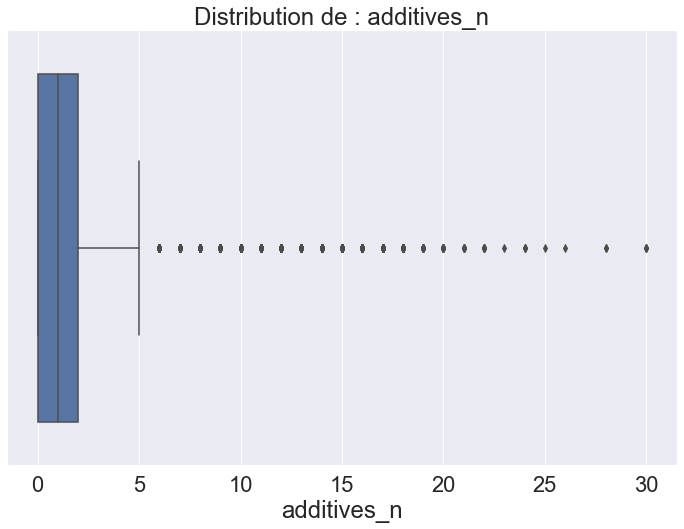

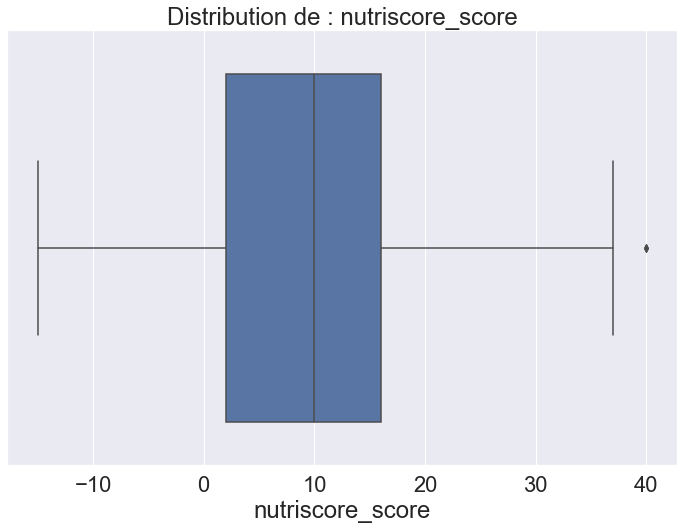

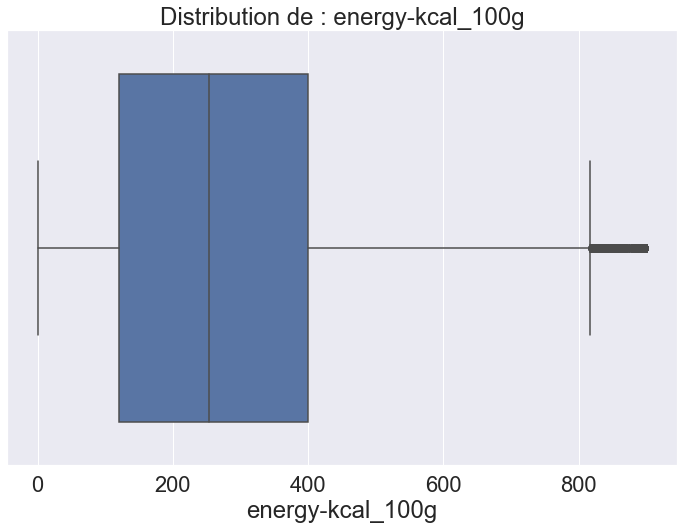

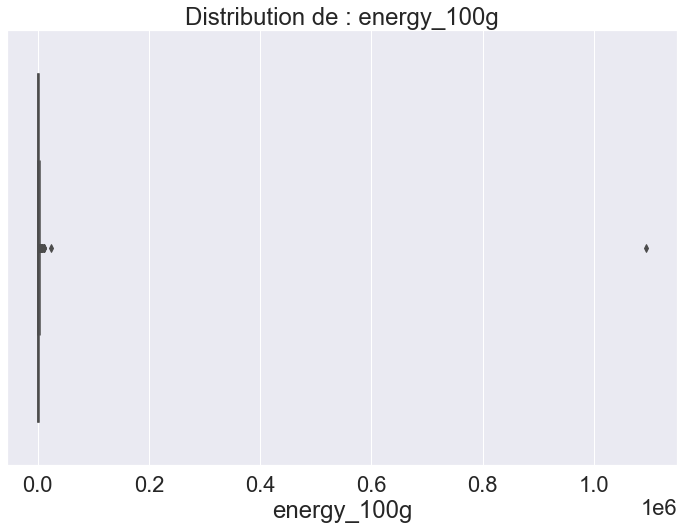

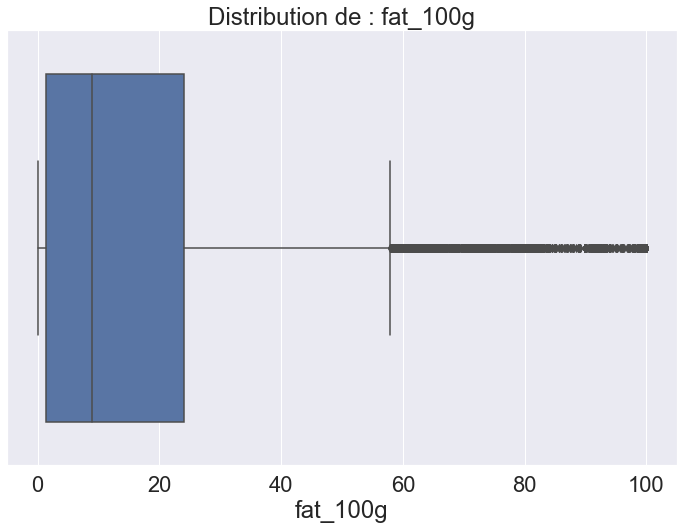

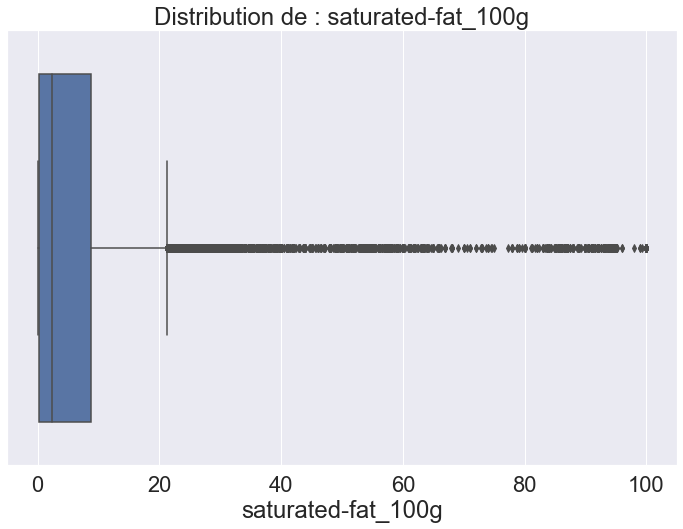

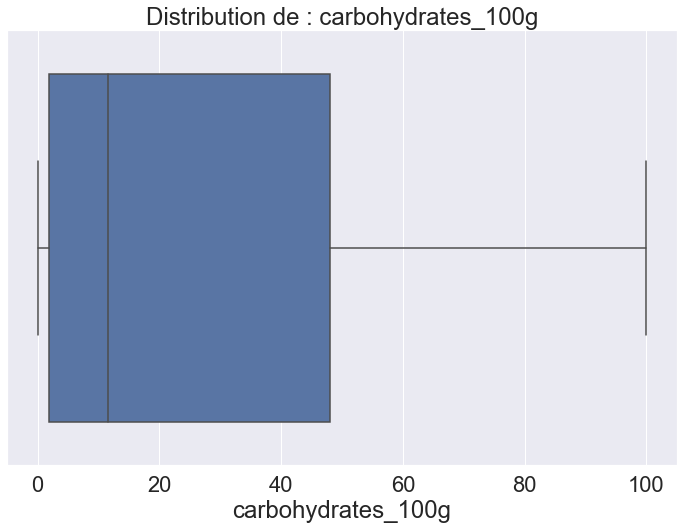

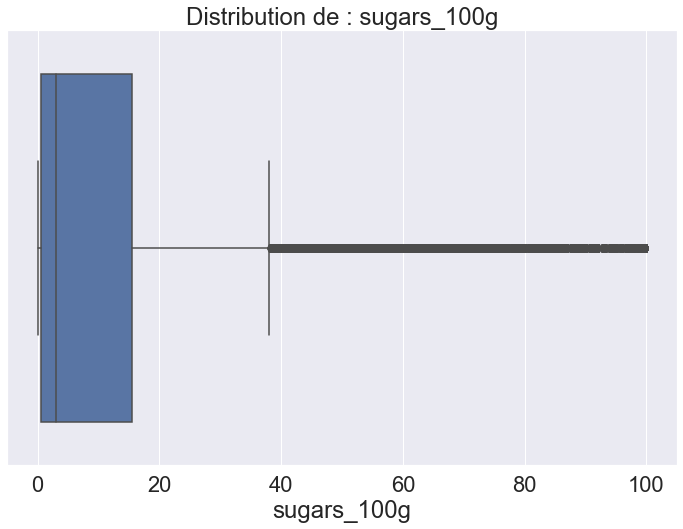

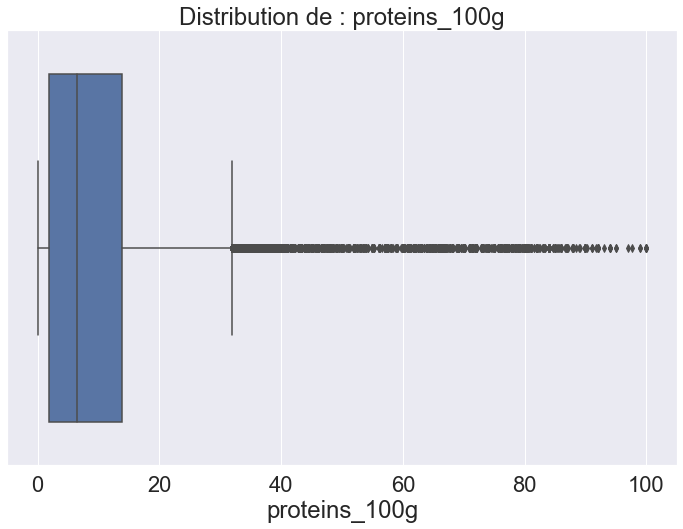

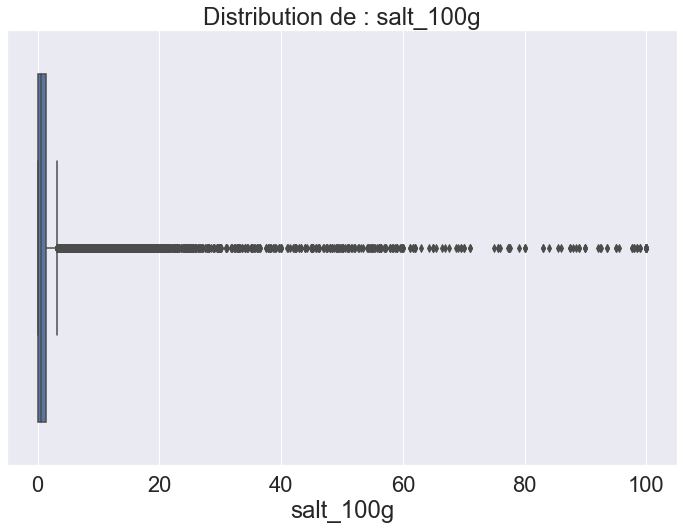

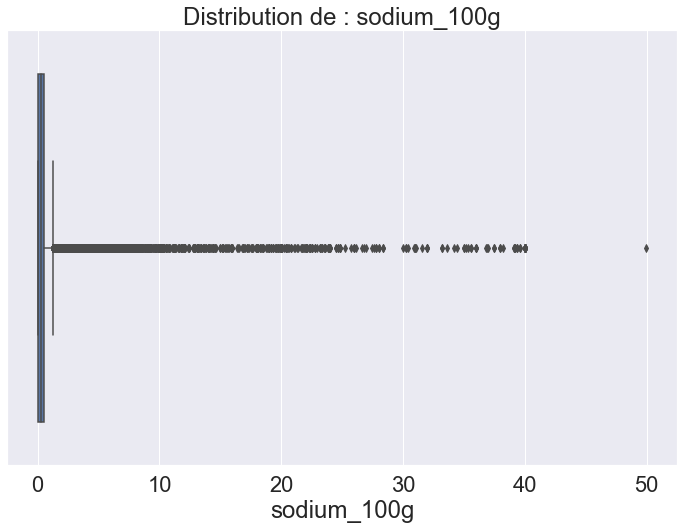

In [25]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (12,8))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

En observant les boxplot, on constate que les différentes variables ne semblent pas suivre une loi normale.

# Test de Normalité

### 3 - Test de normalité Kolmogorov Smirnov

Ce test donne une bonne indication d'ajustement à une loi normale.

H0 : l'échantillon de la population est normalment distribué <br>
H1 : l'échantillon de la population n'est pas normalement distribué <br>
<strong> on rejette H0 si la valeur de la probabilité ou bien le p-value est inférieur à 0.05 . 

In [26]:
from scipy import stats
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]

for column in numeric_columns:
    print('________\n{}'.format(column))
    D, p = stats.kstest(data[column].dropna(), 
                     'norm', 
                     args=(data[column].mean(), data[column].std()))
    alpha = 5e-2
    print("p = {}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

________
nutriscore_score
p = 0.0
H0 est rejetée : nutriscore_score n'est pas de distribution normale
________
energy-kcal_100g
p = 0.0
H0 est rejetée : energy-kcal_100g n'est pas de distribution normale
________
energy_100g
p = 0.0
H0 est rejetée : energy_100g n'est pas de distribution normale
________
fat_100g
p = 0.0
H0 est rejetée : fat_100g n'est pas de distribution normale
________
saturated-fat_100g
p = 0.0
H0 est rejetée : saturated-fat_100g n'est pas de distribution normale
________
carbohydrates_100g
p = 0.0
H0 est rejetée : carbohydrates_100g n'est pas de distribution normale
________
sugars_100g
p = 0.0
H0 est rejetée : sugars_100g n'est pas de distribution normale
________
proteins_100g
p = 0.0
H0 est rejetée : proteins_100g n'est pas de distribution normale
________
salt_100g
p = 0.0
H0 est rejetée : salt_100g n'est pas de distribution normale
________
sodium_100g
p = 0.0
H0 est rejetée : sodium_100g n'est pas de distribution normale


Le test de Kolmogorov Smirnov confirme la non normalité des distributions de données.

### 4- Test de normalité de Shapiro - Wilk

Pour vérifier le test de kolmogrov-Smirnov on utilise le test de Shapiro Wilk.

In [27]:
from scipy import stats
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]
for column in numeric_columns:
    print('________\n{}'.format(column))
    k2, p = stats.shapiro(data[column])
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothese: x a une distribution normale
        print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

________
nutriscore_score
p = 0
H0 est rejetée : nutriscore_score n'est pas de distribution normale
________
energy-kcal_100g
p = 0
H0 est rejetée : energy-kcal_100g n'est pas de distribution normale
________
energy_100g
p = 0
H0 est rejetée : energy_100g n'est pas de distribution normale
________
fat_100g
p = 0
H0 est rejetée : fat_100g n'est pas de distribution normale
________
saturated-fat_100g
p = 0
H0 est rejetée : saturated-fat_100g n'est pas de distribution normale
________
carbohydrates_100g
p = 0
H0 est rejetée : carbohydrates_100g n'est pas de distribution normale
________
sugars_100g
p = 0
H0 est rejetée : sugars_100g n'est pas de distribution normale
________
proteins_100g
p = 0
H0 est rejetée : proteins_100g n'est pas de distribution normale
________
salt_100g
p = 0
H0 est rejetée : salt_100g n'est pas de distribution normale
________
sodium_100g
p = 0
H0 est rejetée : sodium_100g n'est pas de distribution normale


<strong>Conclusion:</strong><br>
Aucune de nos variables ne suit une loi normale.

# Analyses bivariées des variables

## a) Analyses bivariées des variables quantitatives

Avant de réaliser des tests d'indépendance, on projette graphiquement les données 2 à 2

In [28]:
data_numeric = data[numeric_columns]

In [29]:
data_numeric.head()

,nutriscore_score,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
0,18.0,169.0,936.0,8.2,2.2,29.0,22.0,5.1,4.60,1.840
1,1.0,32.0,134.0,0.3,0.1,5.3,3.9,0.9,0.42,0.168
2,14.0,381.0,1594.0,22.0,15.5,27.3,21.9,4.6,0.10,0.040
3,-2.0,157.0,657.0,0.0,0.0,36.0,27.0,0.6,0.00,0.000
4,1.0,143.0,598.0,12.7,1.0,3.9,1.0,1.9,0.27,0.108


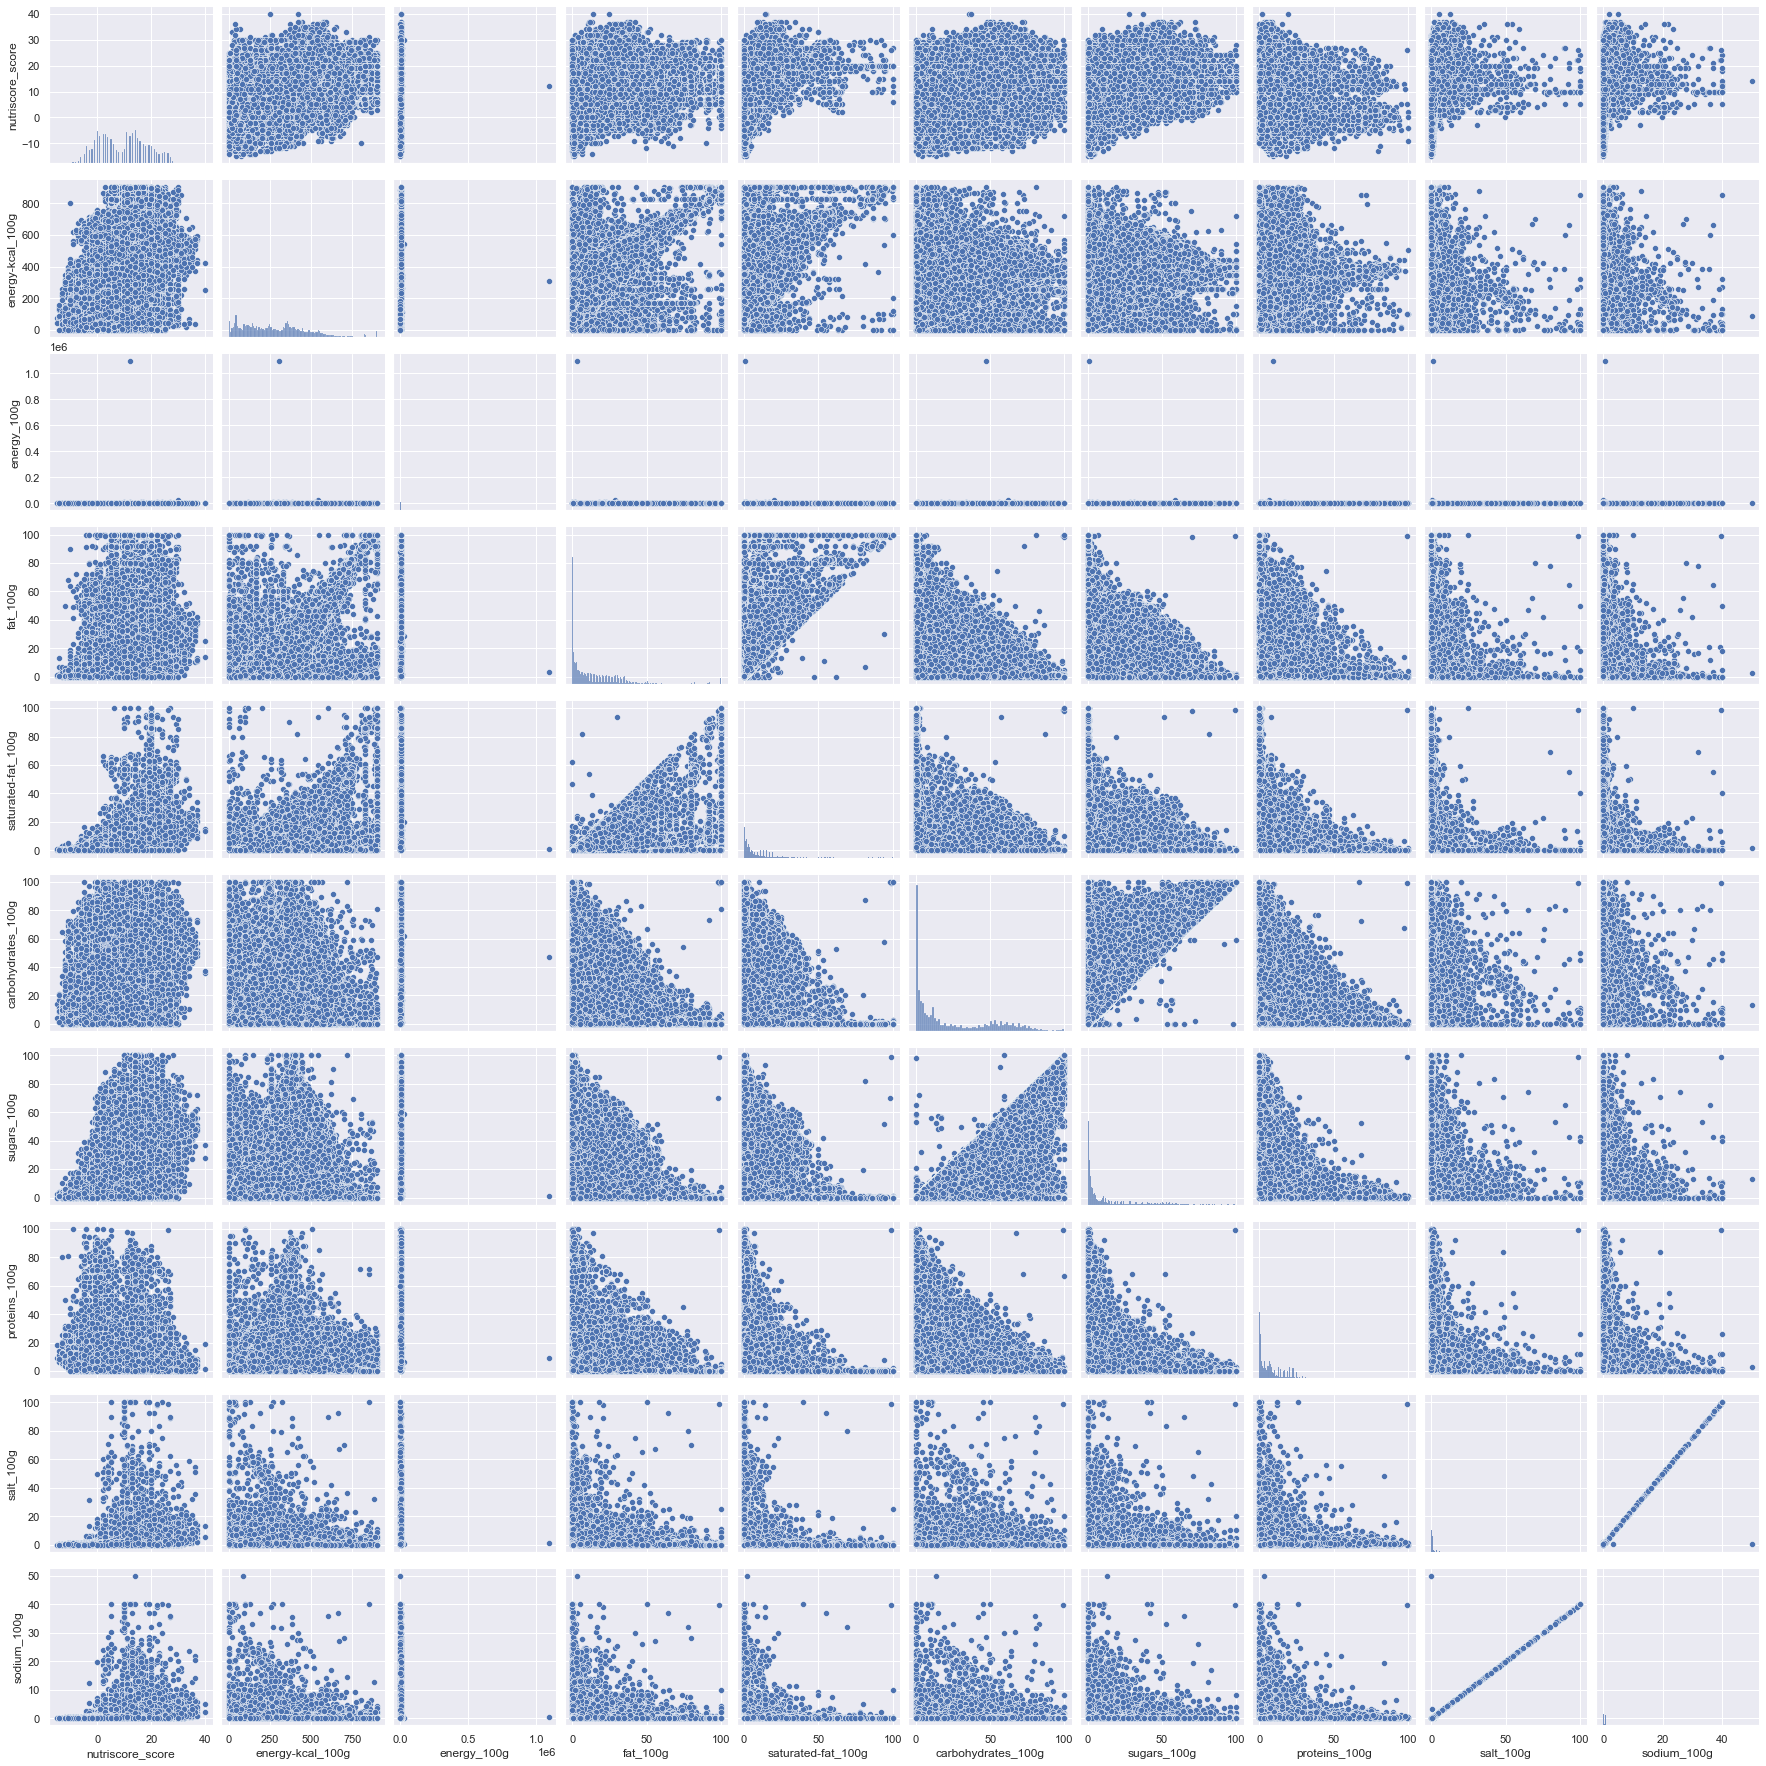

In [30]:
sns.pairplot(data_numeric.iloc[:,0:13])

<strong>Corrélation entre les variables quantitatives</strong><br>
On va d'abord étudier les corrélations entre les différentes variables à l'aide d'une matrice de corrélation.

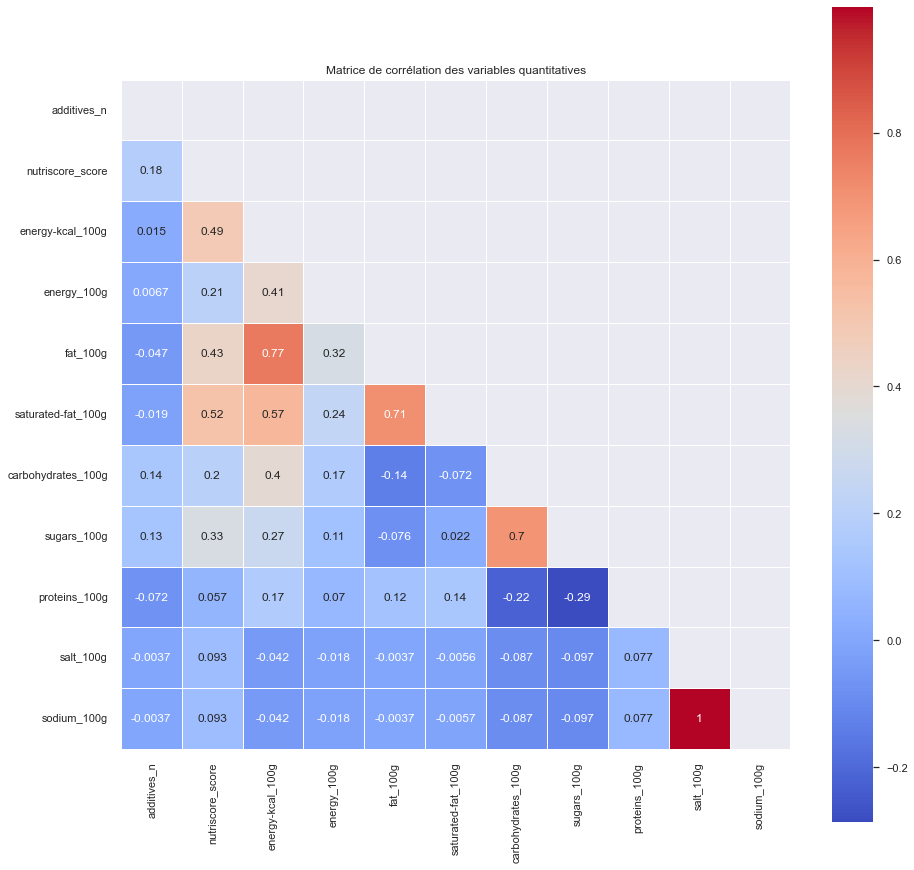

In [475]:
corr_matrix = data.corr()
mask = np.triu(corr_matrix)

plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap="coolwarm", mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Matrice de corrélation des variables quantitatives")
plt.show()

La matrice de corrélation permet de voir les corrélations qui existent entre les différentes variables quantitatives.<br>
On remarque une <strong> forte corrélation positive </strong> entre : <br><br>
la quantité <strong> d'énergie en kcal pour 100g </strong> et la quantité de <strong> graisses pour 100g </strong> (0.78) . </strong><br> 
la quantité de <strong> graisses saturées pour 100g </strong>  et la quantité de <strong> graisses  pour 100g </strong> (0.71).<br>
la quantité de  <strong> sucres pour 100g </strong> et la quantité de <strong> carbohydrates pour 100g </strong> (0.7).<br><br>
et <strong> une corrélation </strong> entre : <br><br>
la quantité <strong> d'énergie en kcal pour 100g </strong> et la quantité de <strong> nutrition score en 100g </strong> (0.55) .<br>
la quantité de <strong> graisses saturées pour 100g </strong>  et <strong> nutrition score en 100g </strong> (0.57).



### Test de corrélation Pearson

L'intérêt des tests de corrélation est d'apporter plus de pertinence et fiabilité aux coefficients de corrélation. Il existe différents test de corrélation, nous utilisons celui de <strong> Pearson. </strong>

#### La première sortie correspond au coefficient de corrélation, la seconde à la p-value (ou probabilité critique)

In [33]:
from scipy.stats import pearsonr

In [476]:
data_numeric.columns

Index(['nutriscore_score', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

**energy-kcal_100g   VS   nutriscore_score**

In [34]:
pearsonr(data['energy-kcal_100g'], data['nutriscore_score'])

(0.5477352266830551, 0.0)

les variables energy-kcal_100g et nutriscore_score ne sont pas corrélées 

<strong> nutriscore_score </strong>  VS   <strong> energy_100g </strong>

In [478]:
pearsonr(data['nutriscore_score'], data['energy_100g'])

(0.20636728484216005, 0.0)

les variables nutriscore_score et energy_100g ne sont pas corrélées 

<strong> nutriscore_score  VS  saturated-fat_100g </strong>

In [491]:
pearsonr(data['nutriscore_score'], data['saturated-fat_100g'])

(0.5221445085888389, 0.0)

les variables energy-kcal_100g et saturated-fat_100g  sont  corrélées 

<strong> nutriscore_score  VS  salt_100g </strong>

In [492]:
pearsonr(data['nutriscore_score'], data['salt_100g'])

(0.0930412865489146, 0.0)

les variables nutriscore_score et salt_100g ne sont pas corrélées 

****
***Résultat*** 
****
Les résultats ne sont pas fiables puisque les test de normalités montrent que nos variables ne suivent pas une loi normale donc on va faire le test de  Spearman pour vérifier s'il existe une relation entre la variable nutriscore et les autres variables.

### 4- Test de corrélation de Spearman 

In [487]:
from scipy import stats


<strong> nutriscore_score  VS  salt_100g </strong>

In [508]:
stats.spearmanr(data['nutriscore_score'], data['salt_100g'])

SpearmanrResult(correlation=0.28377832647995604, pvalue=0.0)

on voit qu'il na pas de relation de corrélation entre les deux variables

<strong> nutriscore_score  VS  saturated-fat_100g </strong>

In [509]:
stats.spearmanr(data['nutriscore_score'], data['saturated-fat_100g'])

SpearmanrResult(correlation=0.5428391492184915, pvalue=0.0)

on voit qu'il ya une relation de corrélation entre le nutriscore et le graisse saturé .

In [510]:
data_numeric.columns

Index(['nutriscore_score', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

<strong> nutriscore_score </strong> VS <strong> fat_100g</strong>

In [511]:
stats.spearmanr(data['nutriscore_score'], data['fat_100g'])

SpearmanrResult(correlation=0.5011463696050406, pvalue=0.0)

il existe une relation entre le nutriscore et la graisse.

<strong> nutriscore_score </strong> VS <strong> salt_100g</strong>

In [512]:
stats.spearmanr(data['nutriscore_score'], data['salt_100g'])

SpearmanrResult(correlation=0.28377832647995604, pvalue=0.0)

<strong> nutriscore_score </strong> VS <strong> sugars_100g</strong>

In [513]:
stats.spearmanr(data['nutriscore_score'], data['sugars_100g'])

SpearmanrResult(correlation=0.23734566533604431, pvalue=0.0)

<strong> nutriscore_score </strong> VS <strong> energy-kcal_100g </strong>

In [514]:
stats.spearmanr(data['nutriscore_score'], data['energy-kcal_100g'])

SpearmanrResult(correlation=0.5103101533719828, pvalue=0.0)

il y a une corrélation entre le nutriscore et l'énérgie en calorie

<strong> nutriscore_score </strong> VS <strong> carbohydrates_100g </strong>

In [498]:
stats.spearmanr(data['nutriscore_score'], data['carbohydrates_100g'])

SpearmanrResult(correlation=0.13300885283613118, pvalue=0.0)

il n y a pas de corrélation significative  entre le nutriscore et les carbohydrates

<strong> nutriscore_score </strong> VS <strong> sodium_100g </strong>

In [499]:
stats.spearmanr(data['nutriscore_score'], data['sodium_100g'])

SpearmanrResult(correlation=0.2837807513997692, pvalue=0.0)

<strong> nutriscore_score </strong> VS <strong> proteins_100g </strong>

In [501]:
stats.spearmanr(data['nutriscore_score'], data['proteins_100g'])

SpearmanrResult(correlation=0.10102679794578222, pvalue=0.0)

****
***Conclusion***
****
le test de Spearman a confirmé qu'il existe une dépendance significative entre nos variables tel que le nutriscore et l'énérgie en calorie ainsi la graisse 

<strong> b) Analyses bivariées des variables qualitatives </strong>

In [179]:
df = data.copy()


In [181]:
#Tableau de contigence de deux variables nutriscore_grade et ingrédients de l'huile de palme
data_crosstab = pd.crosstab(df['nutriscore_grade'],df['ingredients_from_palm_oil_n'] ,margins = False)


In [183]:
data_crosstab


ingredients_from_palm_oil_n,0.0,1.0,2.0
nutriscore_grade,,,
a,28029,140,1
b,24273,261,1
c,37223,1121,12
d,47548,2860,69
e,30697,3774,36


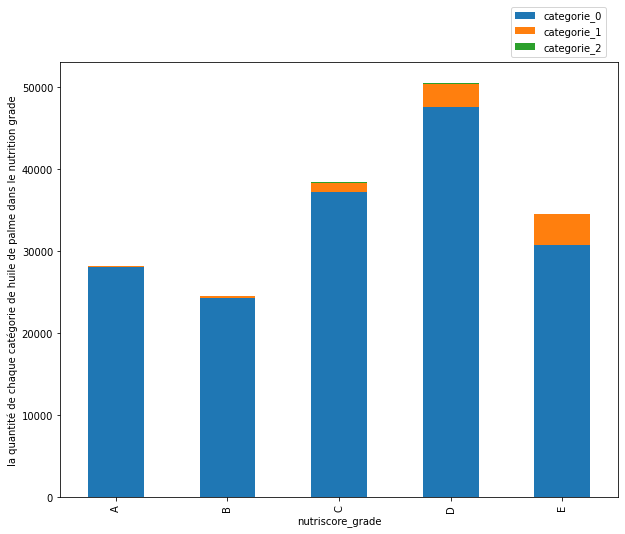

In [197]:
grade=["A","B","C","D","E"]
data_dic={
    "categorie_0":[28020,24273,37222,47548,30697],
    "categorie_1":[140,261,1121,2860,3774],
    "categorie_2":[1,1,12,69,36],
}

df=pd.DataFrame(data_dic,index=grade)

df.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.xlabel('nutriscore_grade')
plt.ylabel('la quantité de chaque catégorie de huile de palme dans le nutrition grade')
plt.show()

In [188]:
df1 = data.copy()

In [194]:
#Tableau de contigence de deux variables nutriscore_grade et ingrédients qui peuvent etre de huile de palme
data_crosstab_1 = pd.crosstab(df1['nutriscore_grade'],df1['ingredients_from_palm_oil_n'] ,margins = False)


In [191]:
data_crosstab_1

ingredients_from_palm_oil_n,0.0,1.0,2.0
nutriscore_grade,,,
a,28029,140,1
b,24273,261,1
c,37223,1121,12
d,47548,2860,69
e,30697,3774,36


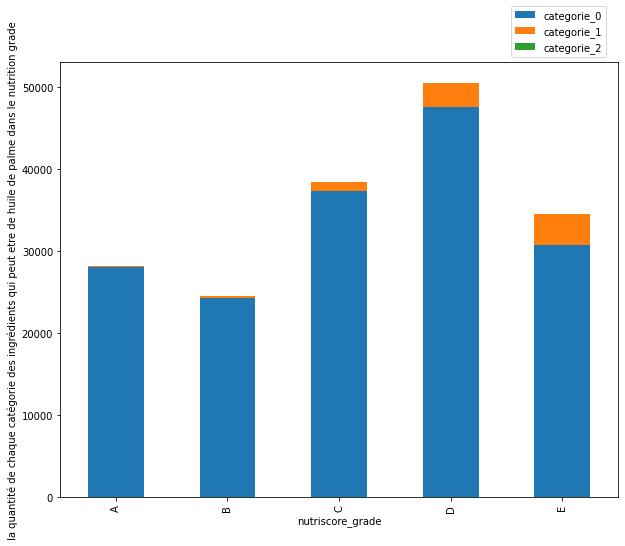

In [196]:
grade=["A","B","C","D","E"]
data_dic_1={
    "categorie_0":[28029,24273,37223,47548,30697],
    "categorie_1":[140,261,1121,2860,3774],
    "categorie_2":[1,1,12,69,36],
}

df_2=pd.DataFrame(data_dic_1,index=grade)

df.plot(kind="bar",stacked=True,figsize=(10,8))
plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.xlabel('nutriscore_grade')
plt.ylabel('la quantité de chaque catégorie des ingrédients qui peut etre de huile de palme dans le nutrition grade')
plt.show()

### Test du Khi²- Indépendance des variables

L'intérêt du test du Khi² est de mesurer l'indépendance entre deux variables qualitatives à partir du tableau de contigence.

On pose les hypothèses de départ :<br><br>
 - H0 : Variables indépendantes si p-value > 5%<br>
 - H1 : Variables non indépendantes si p-value < 5%

In [322]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def test_chi2(serie1, serie2):
    
    alpha = 0.05   
    
    #H0 : les variables sont indépendantes
    
    #print('tableau de contingence :\n', pd.crosstab(serie1.array, serie2.array))
    tab_contingence = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p_value , dof, expected_table = chi2_contingency(tab_contingence.values)
    #print('tableau de contingence : \n', tab_contingence)
     
    
    

    if p_value <= alpha :
        
        print('Variables dépendantes  (H0 rejetée) car p_value = {} <= alpha = {}' .format (p_value, alpha))
        
    else :
       
      print('Variables indépendantes car p_value = {}  > = alpha = {}'.format (p_value, alpha))
        
        

In [521]:
category_columns = data.select_dtypes(include = 'category').columns

In [522]:
category_columns

Index(['countries', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_grade'],
      dtype='object')

<strong> nutriscore_grade </strong> VS <strong>  Ingredients_from_palm_oil_n</strong>

In [520]:
test_chi2(data.nutriscore_grade,data.ingredients_from_palm_oil_n)

Variables dépendantes  (H0 rejetée) car p_value = 0.0 <= alpha = 0.05


<strong> nutriscore_grade </strong> VS <strong> ingredients_that_may_be_from_palm_oil_n</strong>

In [524]:
test_chi2(data.nutriscore_grade,data.ingredients_that_may_be_from_palm_oil_n)

Variables dépendantes  (H0 rejetée) car p_value = 0.0 <= alpha = 0.05


****
***Conclusion***
****
On a la dépendance entre la variable nutriscore_grade et les ingrédients de l'huile de palme

##  Analyses bivariées des variables qualitatives et quantitatives

# Anova à 1 facteur

On effectue une analyse de variance pour mesurer l’indépendance entre une variable qualitative et une quantitative.

Dans une ANOVA, on cherche à déterminer si les moyennes des groupes sont significativement différentes. On pose donc :

H0 : Les moyennes de chaque groupe sont égales si p-value > 5%  : le facteur n'a aucune influence sur la variable dépendante <br>
H1 : Les moyennes de chaque groupe ne sont pas toutes égales si p-value < 5% : le facteur a bien une influence sur la variable dépendante <br>

<strong> Analyses entre la quantité de graisse et le nutriscore_grade </strong>


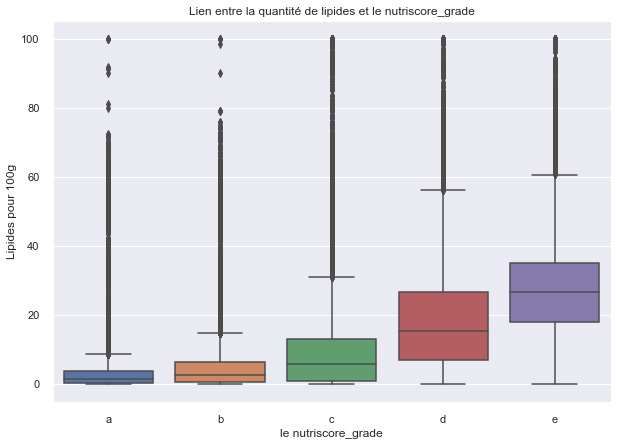

In [538]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="fat_100g", data=data)
plt.xlabel("le nutriscore_grade")
plt.ylabel("Lipides pour 100g")
plt.title("Lien entre la quantité de lipides et le nutriscore_grade")
plt.show()

Lançons l'ANOVA pour tester l'influence de nombre d'ingrédients issus de l'huile de palme de la quantité la quantité de lipides  :


In [528]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
anova_variete = smf.ols('fat_100g~nutriscore_grade', data=data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:               fat_100g   R-squared:                       0.179
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                 1.679e+04
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:36:18   Log-Likelihood:            -1.3096e+06
No. Observations:              307423   AIC:                         2.619e+06
Df Residuals:                  307418   BIC:                         2.619e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.75

### Réalisez un test de Fisher

Ce qui nous intéresse réellement, c'est le test de Fisher. La p-valeur de ce test (  0.00 ) est   inférieure à 5 %. On rejette donc l'hypothèse H0.<br>
le nutriscore_grade donc bien un effet sur la quantité de lipides, comme nous en avions l'intuition en regardant les boîtes à moustaches.

<strong> Analyses entre la quantité de sucre et le nutriscore_grade </strong>


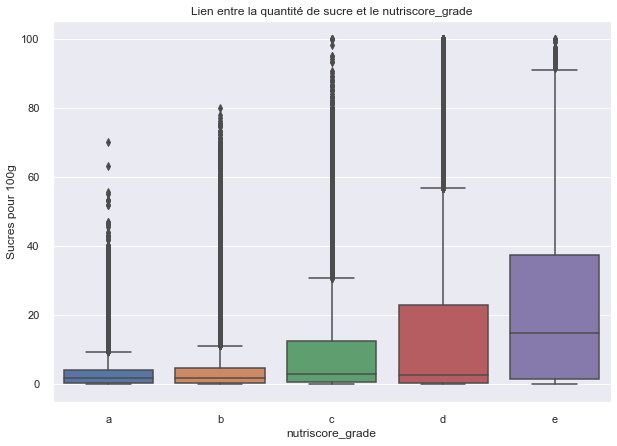

In [537]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="sugars_100g", data=data)
plt.title("Lien entre la quantité de sucre et le nutriscore_grade")
plt.xlabel("nutriscore_grade")
plt.ylabel("Sucres pour 100g")
plt.show()

In [530]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
anova_variete = smf.ols('sugars_100g~nutriscore_grade', data=data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:            sugars_100g   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     9899.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:38:48   Log-Likelihood:            -1.3121e+06
No. Observations:              307423   AIC:                         2.624e+06
Df Residuals:                  307418   BIC:                         2.624e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 3.51

### Réalisez un test de Fisher

La p-valeur de ce test (0.00) est inférieure à 5 %. On rejette donc l'hypothèse H0.<br>
le nutrition_grade a donc bien un effet sur la quantité de sucre, comme nous en avions l'intuition en regardant les boîtes à moustaches.

<strong> Analyses entre la quantité de protéines et le nutriscore_grade </strong>

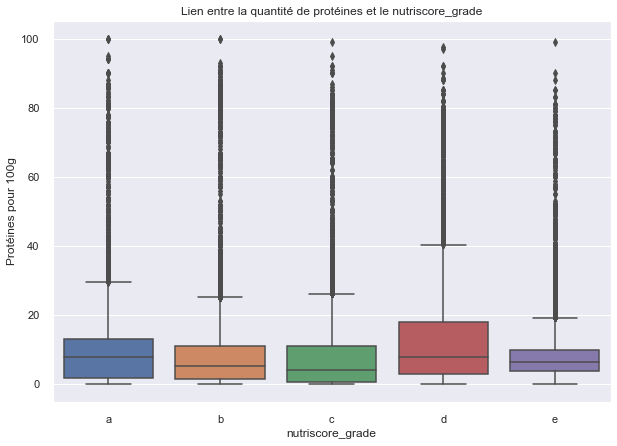

In [536]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="proteins_100g", data=data)
plt.xlabel("nutriscore_grade")
plt.ylabel("Protéines pour 100g")
plt.title("Lien entre la quantité de protéines et le nutriscore_grade")
plt.show()

In [532]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
anova_variete = smf.ols('proteins_100g~nutriscore_grade', data=data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:          proteins_100g   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     1987.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:40:58   Log-Likelihood:            -1.1110e+06
No. Observations:              307423   AIC:                         2.222e+06
Df Residuals:                  307418   BIC:                         2.222e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 9.39

### Réalisez un test de Fisher

La p-valeur de ce test ( 0.00) est  inférieure à 5 %. On rejette donc l'hypothèse H0.<br>
le nutrition_grade a donc bien un effet sur la quantité de protéines.

<strong> Analyses entre la quantité de carbohydrates et le nutriscore_grade</strong>

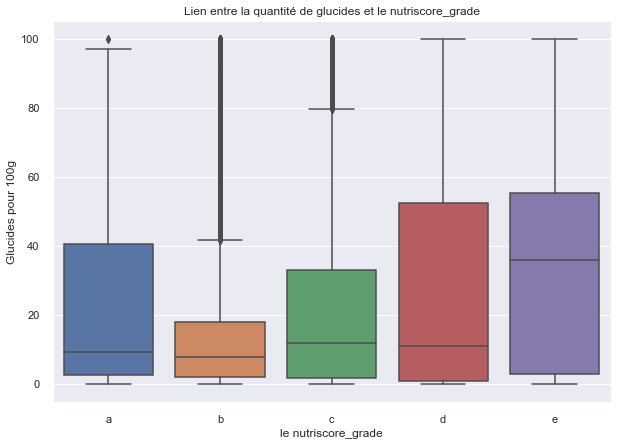

In [539]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="carbohydrates_100g", data=data)
plt.title("Lien entre la quantité de glucides et le nutriscore_grade")
plt.xlabel("le nutriscore_grade")
plt.ylabel("Glucides pour 100g")
plt.show()

In [534]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
anova_variete = smf.ols('carbohydrates_100g~nutriscore_grade', data=data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:     carbohydrates_100g   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     2645.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:42:32   Log-Likelihood:            -1.4390e+06
No. Observations:              307423   AIC:                         2.878e+06
Df Residuals:                  307418   BIC:                         2.878e+06
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                22.13

### Réalisez un test de Fisher

La p-valeur de ce test ( 0.00) est  inférieure à 5 %. On rejette donc l'hypothèse H0.<br>
le nutrition_grade  donc bien un effet sur la quantité de carbohydrates, comme nous en avions l'intuition en regardant les boîtes à moustaches.

<strong> Analyses entre la quantité de sel et le nutriscore_grade </strong>

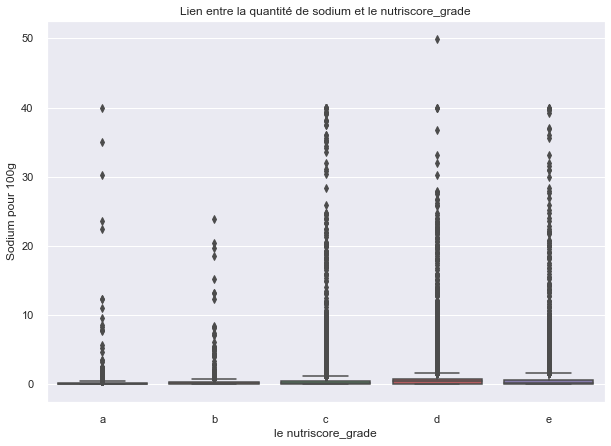

In [540]:
plt.figure(figsize=(10, 7))
sns.boxplot(x="nutriscore_grade", y="sodium_100g", data=data)
plt.title("Lien entre la quantité de sodium et le nutriscore_grade")
plt.xlabel("le nutriscore_grade")
plt.ylabel("Sodium pour 100g")
plt.show()

In [541]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
anova_variete = smf.ols('sodium_100g~nutriscore_grade', data=data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:            sodium_100g   R-squared:                       0.032
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     2545.
Date:                Sat, 18 Dec 2021   Prob (F-statistic):               0.00
Time:                        23:47:34   Log-Likelihood:            -4.2564e+05
No. Observations:              307423   AIC:                         8.513e+05
Df Residuals:                  307418   BIC:                         8.513e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.11

La p-valeur de ce test (6.08e-10) est  inférieure à 5 %. On rejette donc l'hypothèse H0.<br>
le nutriscore_grade a donc bien un effet sur la quantité de sodium, comme nous en avions l'intuition en regardant les boîtes à moustaches.

# Réduction de dimensions

In [542]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math

In [543]:
scaler = StandardScaler()
pca = PCA(n_components=2)


In [544]:
data = data[["additives_n", 'energy-kcal_100g', "saturated-fat_100g", "fat_100g","sugars_100g", "carbohydrates_100g",
                'proteins_100g', 'sodium_100g']]
X = data.values
features = data.columns
X_scaled = scaler.fit_transform(X)
pca_components = pca.fit_transform(X_scaled)
pcs = pca.components_





In [47]:
data.to_csv("C:/Users/lenovo/data/openfoodfacts_clean_clus.csv", index=False)

In [545]:
pca.components_



array([[-0.00155856,  0.59182901,  0.52568205,  0.57009477,  0.12849653,
         0.12832122,  0.12017035, -0.03110836],
       [-0.19800659, -0.11798381,  0.14902825,  0.19178912, -0.60350347,
        -0.61454068,  0.35490672,  0.14158126]])

In [546]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                      plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
            plt.plot(np.cos(an), np.sin(an))
            plt.axis('equal')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

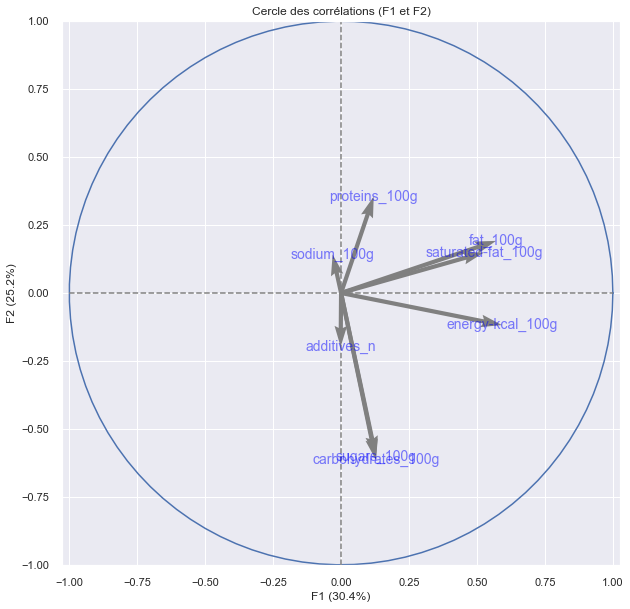

In [345]:
display_circles(pcs, 2, pca, [(0,1)], labels = np.array(features))

F1(30.4%) : Energie en calories et lipides (+ graisses saturées).<br>
F2(25.2%) :Protéines ,carboydrates et sucres.<br>
variance expliquée : 55,6 %

# Apprentissage non-supervisée

## a) Définition de l'algorithme

In [556]:
from sklearn.cluster import KMeans

In [557]:
intra = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(X)
    intra.append(model.inertia_)

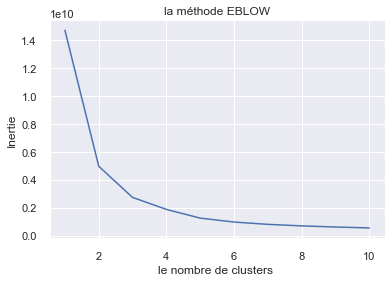

In [558]:
plt.plot(range(1,11),intra)
plt.title("la méthode EBLOW")
plt.xlabel("le nombre de clusters ")
plt.ylabel("Inertie")
plt.show()

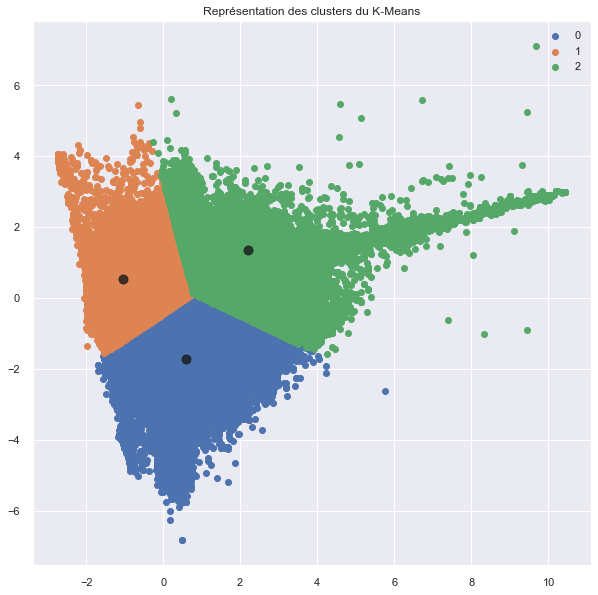

In [560]:
km = KMeans(n_clusters=3)

#Prédiction
label = km.fit_predict(pca_components)
 
centroids = km.cluster_centers_
u_labels = np.unique(label)

#Représentation graphique:

plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(pca_components[label == i , 0] , pca_components[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 0.8, color = 'k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()


In [561]:
from sklearn.pipeline import Pipeline

my_model = Pipeline([('scaler', StandardScaler()),
                     ('pca', PCA(n_components=2)),
                     ('kmeans', KMeans(n_clusters=3))])
my_model.fit(X_scaled)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=2)),
                ('kmeans', KMeans(n_clusters=3))])

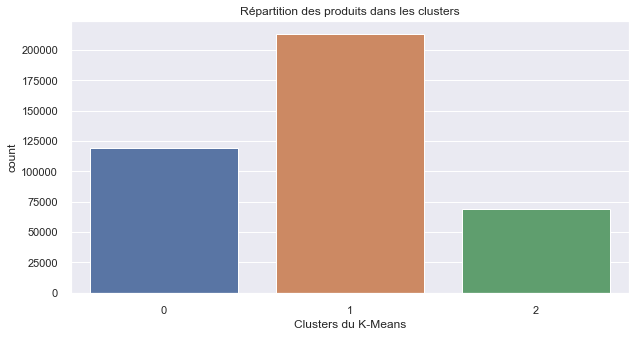

In [562]:
data['Clusters_3'] = km.labels_
plt.figure(figsize=(10,5))
sns.countplot(x="Clusters_3", data=data)
plt.xlabel("Clusters du K-Means")
plt.title("Répartition des produits dans les clusters")
plt.show()

## b) Analyses des clusters obtenus

In [563]:
stats_descr = data.groupby("Clusters_3").mean().round(3)
stats_descr

,additives_n,energy-kcal_100g,saturated-fat_100g,fat_100g,sugars_100g,carbohydrates_100g,proteins_100g,sodium_100g
Clusters_3,,,,,,,,
0,2.010,389.690,5.572,13.201,33.796,61.686,5.834,0.224
1,1.253,140.306,1.911,5.998,4.199,11.530,8.200,0.582
2,0.779,484.326,16.426,42.543,4.326,9.232,15.870,0.576


Cluster 0 : Produits sucrées avec plus de carbohydrates et peu respectueux de l'environnement<br>
Cluster 1 : produits sains et respectueux de l'environnement <br>
Cluster 2 : Produits gras<br>

Comme dans notre  données on a 5 groupes nutrition_grade : de A à E on va choisir le nombre k = 5. 

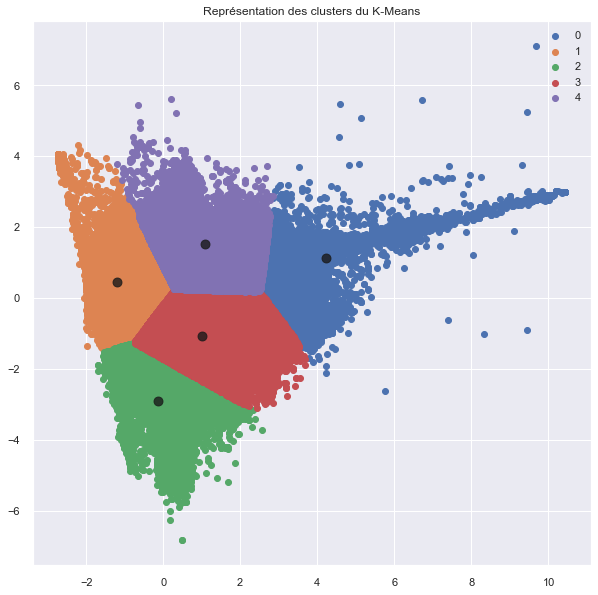

In [552]:
km = KMeans(n_clusters=5)

#Prédiction
label = km.fit_predict(pca_components)
 
centroids = km.cluster_centers_
u_labels = np.unique(label)

#Représentation graphique:

plt.figure(figsize=(10,10))
for i in u_labels:
    plt.scatter(pca_components[label == i , 0] , pca_components[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, alpha = 0.8, color = 'k')
plt.legend()
plt.title('Représentation des clusters du K-Means')
plt.show()